In [1]:
import numpy as np

def target_function(x):
    return np.sin(x)


In [20]:
x_train = np.linspace(-2*np.pi, 2*np.pi, 2000).reshape(-1, 1)
y_train = target_function(x_train)

x_test = np.linspace(-2*np.pi, 2*np.pi, 2000).reshape(-1, 1)
y_test = target_function(x_test)



In [21]:
import torch
from torch import nn

class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(1, 10)  # 输入特征维度为1，第一层10个神经元
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)  # 第二层10个神经元，输出特征维度为1

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

model = TwoLayerNet()


In [22]:
criterion = nn.MSELoss()  # 使用均方误差作为损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 使用Adam优化器

# 将数据转换为torch tensors
x_train_tensor = torch.Tensor(x_train)
y_train_tensor = torch.Tensor(y_train)
x_test_tensor = torch.Tensor(x_test)
y_test_tensor = torch.Tensor(y_test)

# 训练过程
for epoch in range(3000):
    optimizer.zero_grad()
    output = model(x_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.6174293160438538
Epoch 100, Loss: 0.13871541619300842
Epoch 200, Loss: 0.13845786452293396
Epoch 300, Loss: 0.13845443725585938
Epoch 400, Loss: 0.13844873011112213
Epoch 500, Loss: 0.13844765722751617
Epoch 600, Loss: 0.1384505182504654
Epoch 700, Loss: 0.1384488195180893
Epoch 800, Loss: 0.13844619691371918
Epoch 900, Loss: 0.1384599208831787
Epoch 1000, Loss: 0.138445183634758
Epoch 1100, Loss: 0.13844512403011322
Epoch 1200, Loss: 0.138444185256958
Epoch 1300, Loss: 0.13844388723373413
Epoch 1400, Loss: 0.13844305276870728
Epoch 1500, Loss: 0.1384424865245819
Epoch 1600, Loss: 0.1384417861700058
Epoch 1700, Loss: 0.13844133913516998
Epoch 1800, Loss: 0.1384405642747879
Epoch 1900, Loss: 0.1384398192167282
Epoch 2000, Loss: 0.13846485316753387
Epoch 2100, Loss: 0.13843847811222076
Epoch 2200, Loss: 0.13843923807144165
Epoch 2300, Loss: 0.1384596824645996
Epoch 2400, Loss: 0.13843673467636108
Epoch 2500, Loss: 0.13843727111816406
Epoch 2600, Loss: 0.13843569159507751

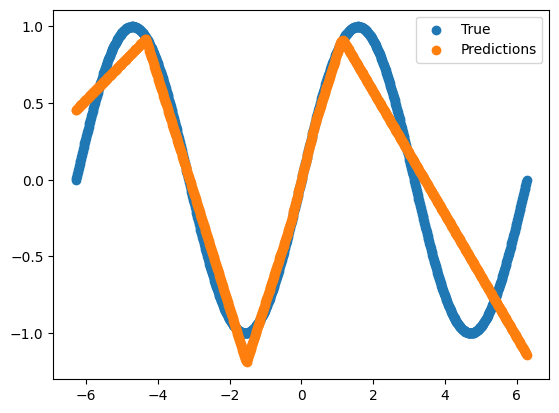

In [23]:
with torch.no_grad():
    predictions = model(x_test_tensor).numpy()

import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, label='True')
plt.scatter(x_test, predictions, label='Predictions')
plt.legend()
plt.show()
